# Mini Projet : Path planning avec la méthode  Q_Learning  

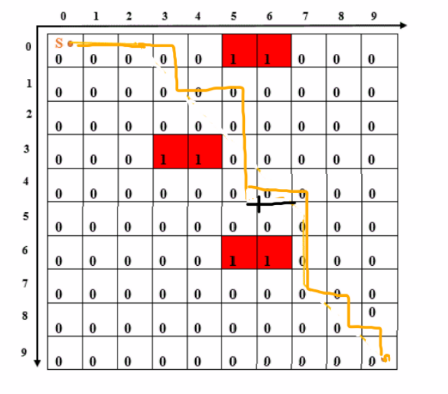

In [3]:
#importation des librairies

import numpy as np
import math
import matplotlib.pyplot as plt


In [4]:
#définir la taille de l'environnement

env_rows = 10
env_columns = 10


#les actions 
actions = ['H', 'B', 'G', 'D']

#initialisation du matrice de récompense par des zeros
R=np.matrix(np.zeros((env_rows,env_columns)))
print(f"La matrice de récomponse : \n {R}")

print("\n*******************************************\n")
print("\n*******************************************\n")

#initialisation du table Q ou Q_function par des zeros
##la dimention de  "action" est constitue de 4 couche cela nous permettra de garder une trace des valeurs Q pour chaque action possible dans chaque état . 
#The value of each (state, action) pair is initialized to 0.
Q_table = np.zeros((env_rows, env_columns, 4))
print(f"La Table Q initiale : \n {Q_table}")


La matrice de récomponse : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

*******************************************


*******************************************

La Table Q initiale : 
 [[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 

In [5]:
#Manupilation des obstacles
#remplacer quelque position dans la matrice R par des 1 pour les representer comme des obstacles
#**1 obstacle
R[0,5]=1
R[0,6]=1
#**2 obstacle
R[3,3]=1
R[3,4]=1
#**3 obstacle
R[6,5]=1
R[6,6]=1


print(f"\nLa nouvelle matrice de récomponse : \n \n {R}")


La nouvelle matrice de récomponse : 
 
 [[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
#Parcourire la matrice R pour déterminer les conditions suivant selon les positions au question
#Si la position P(x,y) = 1 alors R = -10
#Si la position P(x,y) = 0 alors R= 1/dist(P(x,y),G) (G : Goal)

for s in range(10):
    for a in range(10):
        if (s==9 & a==9):
            R[s,a]=100
        elif R[s,a]== 1:
            R[s,a]=-10
        else:
            R[s,a]=1/math.sqrt((pow((a-9),2))+(pow((s-9),2)))
            
#la nouvelle mise a jour de la matrice R
R

matrix([[ 7.85674201e-02,  8.30454799e-02,  8.77058019e-02,
          9.24500327e-02,  9.71285862e-02, -1.00000000e+01,
         -1.00000000e+01,  1.08465229e-01,  1.10431526e-01,
          1.11111111e-01],
        [ 8.30454799e-02,  8.83883476e-02,  9.40720868e-02,
          1.00000000e-01,  1.05999788e-01,  1.11803399e-01,
          1.17041147e-01,  1.21267813e-01,  1.24034735e-01,
          1.25000000e-01],
        [ 8.77058019e-02,  9.40720868e-02,  1.01015254e-01,
          1.08465229e-01,  1.16247639e-01,  1.24034735e-01,
          1.31306433e-01,  1.37360564e-01,  1.41421356e-01,
          1.42857143e-01],
        [ 9.24500327e-02,  1.00000000e-01,  1.08465229e-01,
         -1.00000000e+01, -1.00000000e+01,  1.38675049e-01,
          1.49071198e-01,  1.58113883e-01,  1.64398987e-01,
          1.66666667e-01],
        [ 9.71285862e-02,  1.05999788e-01,  1.16247639e-01,
          1.28036880e-01,  1.41421356e-01,  1.56173762e-01,
          1.71498585e-01,  1.85695338e-01,  1.961161

In [7]:
#tester si on a la valeur 100 qui indique la position notre but
def Goal_Position(current_ligne,current_column):
    return  R[current_ligne,current_column] == 100.
      

In [8]:
#fonction qui choisi une position initial aleatoirement 
def Initial_Position():
  
    #choisir les cordonnées d'un position aléatoirement
    current_line=np.random.randint(10)
    current_column=np.random.randint(10)
    #choisir des cordonnées différente de cordonnées de point goal
    while Goal_Position(current_line,current_column):
        current_line = np.random.randint(10)
        current_column=np.random.randint(10)
        
    return current_line,current_column

In [9]:
#choisie la position de l'action utilisant epsilon
def next_Action(current_line ,current_column ,epsilon):
  #si une valeur choisie au hasard entre 0 et 1 est inférieure à epsilon,puis choisissez la valeur la plus prometteuse de la table Q pour cet état.
    if np.random.random() < epsilon :
        return np.argmax(Q_table[current_line ,current_column])
    else:
      #sinon choisie une action aleatoire
        return np.random.randint(0,4)

In [10]:
# fonction qui obtiendra le prochain emplacement en fonction de l'action choisie 
def next_Position (current_line ,current_column ,action):
    next_Line = current_line
    next_Column = current_column
    
    if actions[action] == 'H' and current_line > 0 : # si par exemple on trouve dans la position (0,0) en peut pas fair cette action a cause au mure
        next_Line -= 1
    
    elif actions[action] == 'D' and current_column < 9 :
        next_Column += 1
        
    elif actions[action]=='B' and current_line < 9 :
        next_Line += 1
    
    
    elif actions[action]=='G' and current_column > 0 :# si par exemple on trouve dans la position (0,0) en peut pas fair cette action a cause de mure
        next_Column -= 1
    
    return next_Line ,next_Column

In [11]:
##fonction pour définir le  chemin optimal
def Optimal_Path(start_Line ,start_Column): 
  
    if Goal_Position(start_Line ,start_Column):
        return [] #si le robot deja dans le goal une path vide sera renvoyé 
    else :
        Path = []
        current_Line ,currentColumn = start_Line ,start_Column
        Path.append([current_Line ,currentColumn]) #on ajoute la position initiale comme la premiere position notre chemin
        
        while not Goal_Position(current_Line ,currentColumn):
            #donne a epsilon 1 dans la fonction next_action()
            action_ = next_Action(current_Line,currentColumn ,1.)
            #position suivante
            current_Line ,currentColumn = next_Position(current_Line ,currentColumn ,action_)
            Path.append([current_Line ,currentColumn])
            
        return Path

In [12]:
def Q_learning( epsilon,  learningRate ,  gamma,  nbRound ):
  for i in range (nbRound):
      #début d'un épisode et en initialiser l'état s
      s ,a = Initial_Position()
      
      while ( not Goal_Position(s ,a)):
        #étape d'un épisode choisir une action a depuis s en utilisant la politique "Actions" spécifiée par Q (par exemple epsilon)
          action = next_Action(s ,a ,epsilon)
          #exécuter l'action a
          #observer la récompense R et l'état s
          new_s ,new_a = s , a
          s ,a = next_Position(s ,a ,action)
          r = R[s ,a]
          old_Qvalue = Q_table[new_s ,new_a ,action]
          #l'équation de bellman
          newQvalue = old_Qvalue + (learningRate * (r + (gamma * np.max(Q_table[s,a])) - old_Qvalue)) 
          Q_table[new_s ,new_a ,action] = newQvalue
          #en repéte jusqu'à ce que s soit l'état terminal
  return Q_table

In [13]:
'''********définir les paramètres :

            epsilon = 0.9     #le pourcentage de temps où nous devrions faire la meilleure action (au lieu d'une action aléatoire)
            gamma = 0.9       #la vitesse à laquelle l'agent IA doit apprendre
            learningRate = 0.9   ***************'''

print(Q_learning( 0.9,  0.9 ,  0.9,  1000 ))

[[[ 7.85674193e-01  1.80818861e+01  7.85594916e-01  7.67563671e-01]
  [ 9.10983605e-01  1.46407527e+01  1.08355475e+01  1.99710942e+01]
  [ 1.80719372e+01  1.62266691e+01  1.80099813e+01  2.21226041e+01]
  [ 2.19770187e+01  2.44779783e+01  1.91403142e+01  1.80442989e+01]
  [ 2.41440901e+01  2.70865139e+01  0.00000000e+00 -8.88475747e+00]
  [-9.00000000e+00  2.99784784e+01  2.18991101e+01  1.78610121e+01]
  [ 1.94658029e+01  3.31852095e+01  0.00000000e+00  2.18104263e+01]
  [ 1.08448397e+00  1.88212183e-01  1.68211286e+01  3.66699438e+01]
  [ 1.16340506e+00  4.06216935e+01  2.98345733e+01  3.27147243e+01]
  [ 2.97722206e+01  3.30079749e+01  3.66692532e+01  0.00000000e+00]]

 [[ 1.62352663e+01  1.60279615e+01  1.73281208e+01  2.00002157e+01]
  [ 1.80091986e+01  1.62838474e+01  1.76811544e+01  2.21242526e+01]
  [ 1.99353951e+01  2.00118777e+01  1.99795023e+01  2.44779783e+01]
  [ 2.21223639e+01  2.21373510e+01  2.21161614e+01  2.70866426e+01]
  [ 2.44730265e+01  2.44900653e+01  2.44769532

In [14]:
print("******* le plus court chemin  afin d'atteindre le but est: ************\n ")
Optimal_Path(0,0)

******* le plus court chemin  afin d'atteindre le but est: ************
 


[[0, 0],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [2, 6],
 [3, 6],
 [3, 7],
 [4, 7],
 [4, 8],
 [5, 8],
 [6, 8],
 [7, 8],
 [8, 8],
 [8, 9],
 [9, 9]]